In [4]:
import sys, os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
import warnings
warnings.filterwarnings("ignore")  # silence warnings
import pandas as pd
from datetime import datetime,date
from causalnex.structure import StructureModel
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE
from causalnex.network import BayesianNetwork
from causalnex.structure.notears import from_pandas
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer, MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
from IPython.display import Image
# import plotly.express as px
import pickle
import matplotlib
matplotlib.style.use('fivethirtyeight')
import datetime
%matplotlib inline
sys.path.append(sys.path.append)
sys.path.insert(0,'../scripts/')
from utils import label_encoder
from data_cleaning import DataCleaning
cleaner = DataCleaning()

DataCleaning module
Dataset Clearning Module


`Finding the Shortest Route`
- You can now make use of the OSMnx package together with the NetworkX package to find the route between two points.
> NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks.

In [6]:
df_clean=pd.read_csv('../data/df_clean_final.csv')

In [ ]:
df_trip_origin_100=cleaner.reverse_location(df_clean)

The sample of the dataset shows that no holidays.

In [ ]:
sample_df=cleaner.reverse_location(sample_df)

In [9]:
sample_df= df_clean.sample(500)

In [17]:
sample_df.to_csv('../loc_sample_df.csv',index=False)

` Label encode non numeric features`

In [11]:
sample_df= pd.read_csv('../loc_sample_df.csv')

In [12]:
sample_df=label_encoder(sample_df)

In [6]:
sample_df.dtypes

order_id                  int64
driver_id                 int64
driver_action             int64
lat                     float64
lng                     float64
Trip Start Time           int64
Trip End Time             int64
Date                      int64
Year                      int64
Month                     int64
Day                       int64
WeekOfYear                int64
Day of Week               int64
Is Weekend                int64
dayofweek                 int64
Duration_Minutes        float64
Trip_Origin_lat         float64
Trip_Origin_lng         float64
Trip_Destination_lat    float64
Trip_Destination_lng    float64
Distance                float64
hour                      int64
fulfilled                 int64
holiday                   int64
weekend                   int64
location                  int64
dtype: object

In [19]:
sample_df.columns

Index(['order_id', 'driver_id', 'driver_action', 'lat', 'lng',
       'Trip Start Time', 'Trip End Time', 'Date', 'Year', 'Month', 'Day',
       'WeekOfYear', 'Day of Week', 'Is Weekend', 'dayofweek',
       'Duration_Minutes', 'Trip_Origin_lat', 'Trip_Origin_lng',
       'Trip_Destination_lat', 'Trip_Destination_lng', 'Distance', 'hour',
       'fulfilled', 'holiday', 'weekend', 'location'],
      dtype='object')

In [10]:
# ! pip install pygraphviz

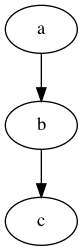

In [9]:
import pygraphviz as pgv
from IPython.display import Image

def draw(dot):
    return Image(pgv.AGraph(dot).draw(format='png', prog='dot'))

g1 = """digraph top {
   a -> b -> c;
}"""
draw(g1)

In [7]:
sm = from_pandas(sample_df)

In [ ]:
sm.edges

In [ ]:
from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE

viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
filename = "./structure_model.png"
viz.draw(filename)
Image(filename)

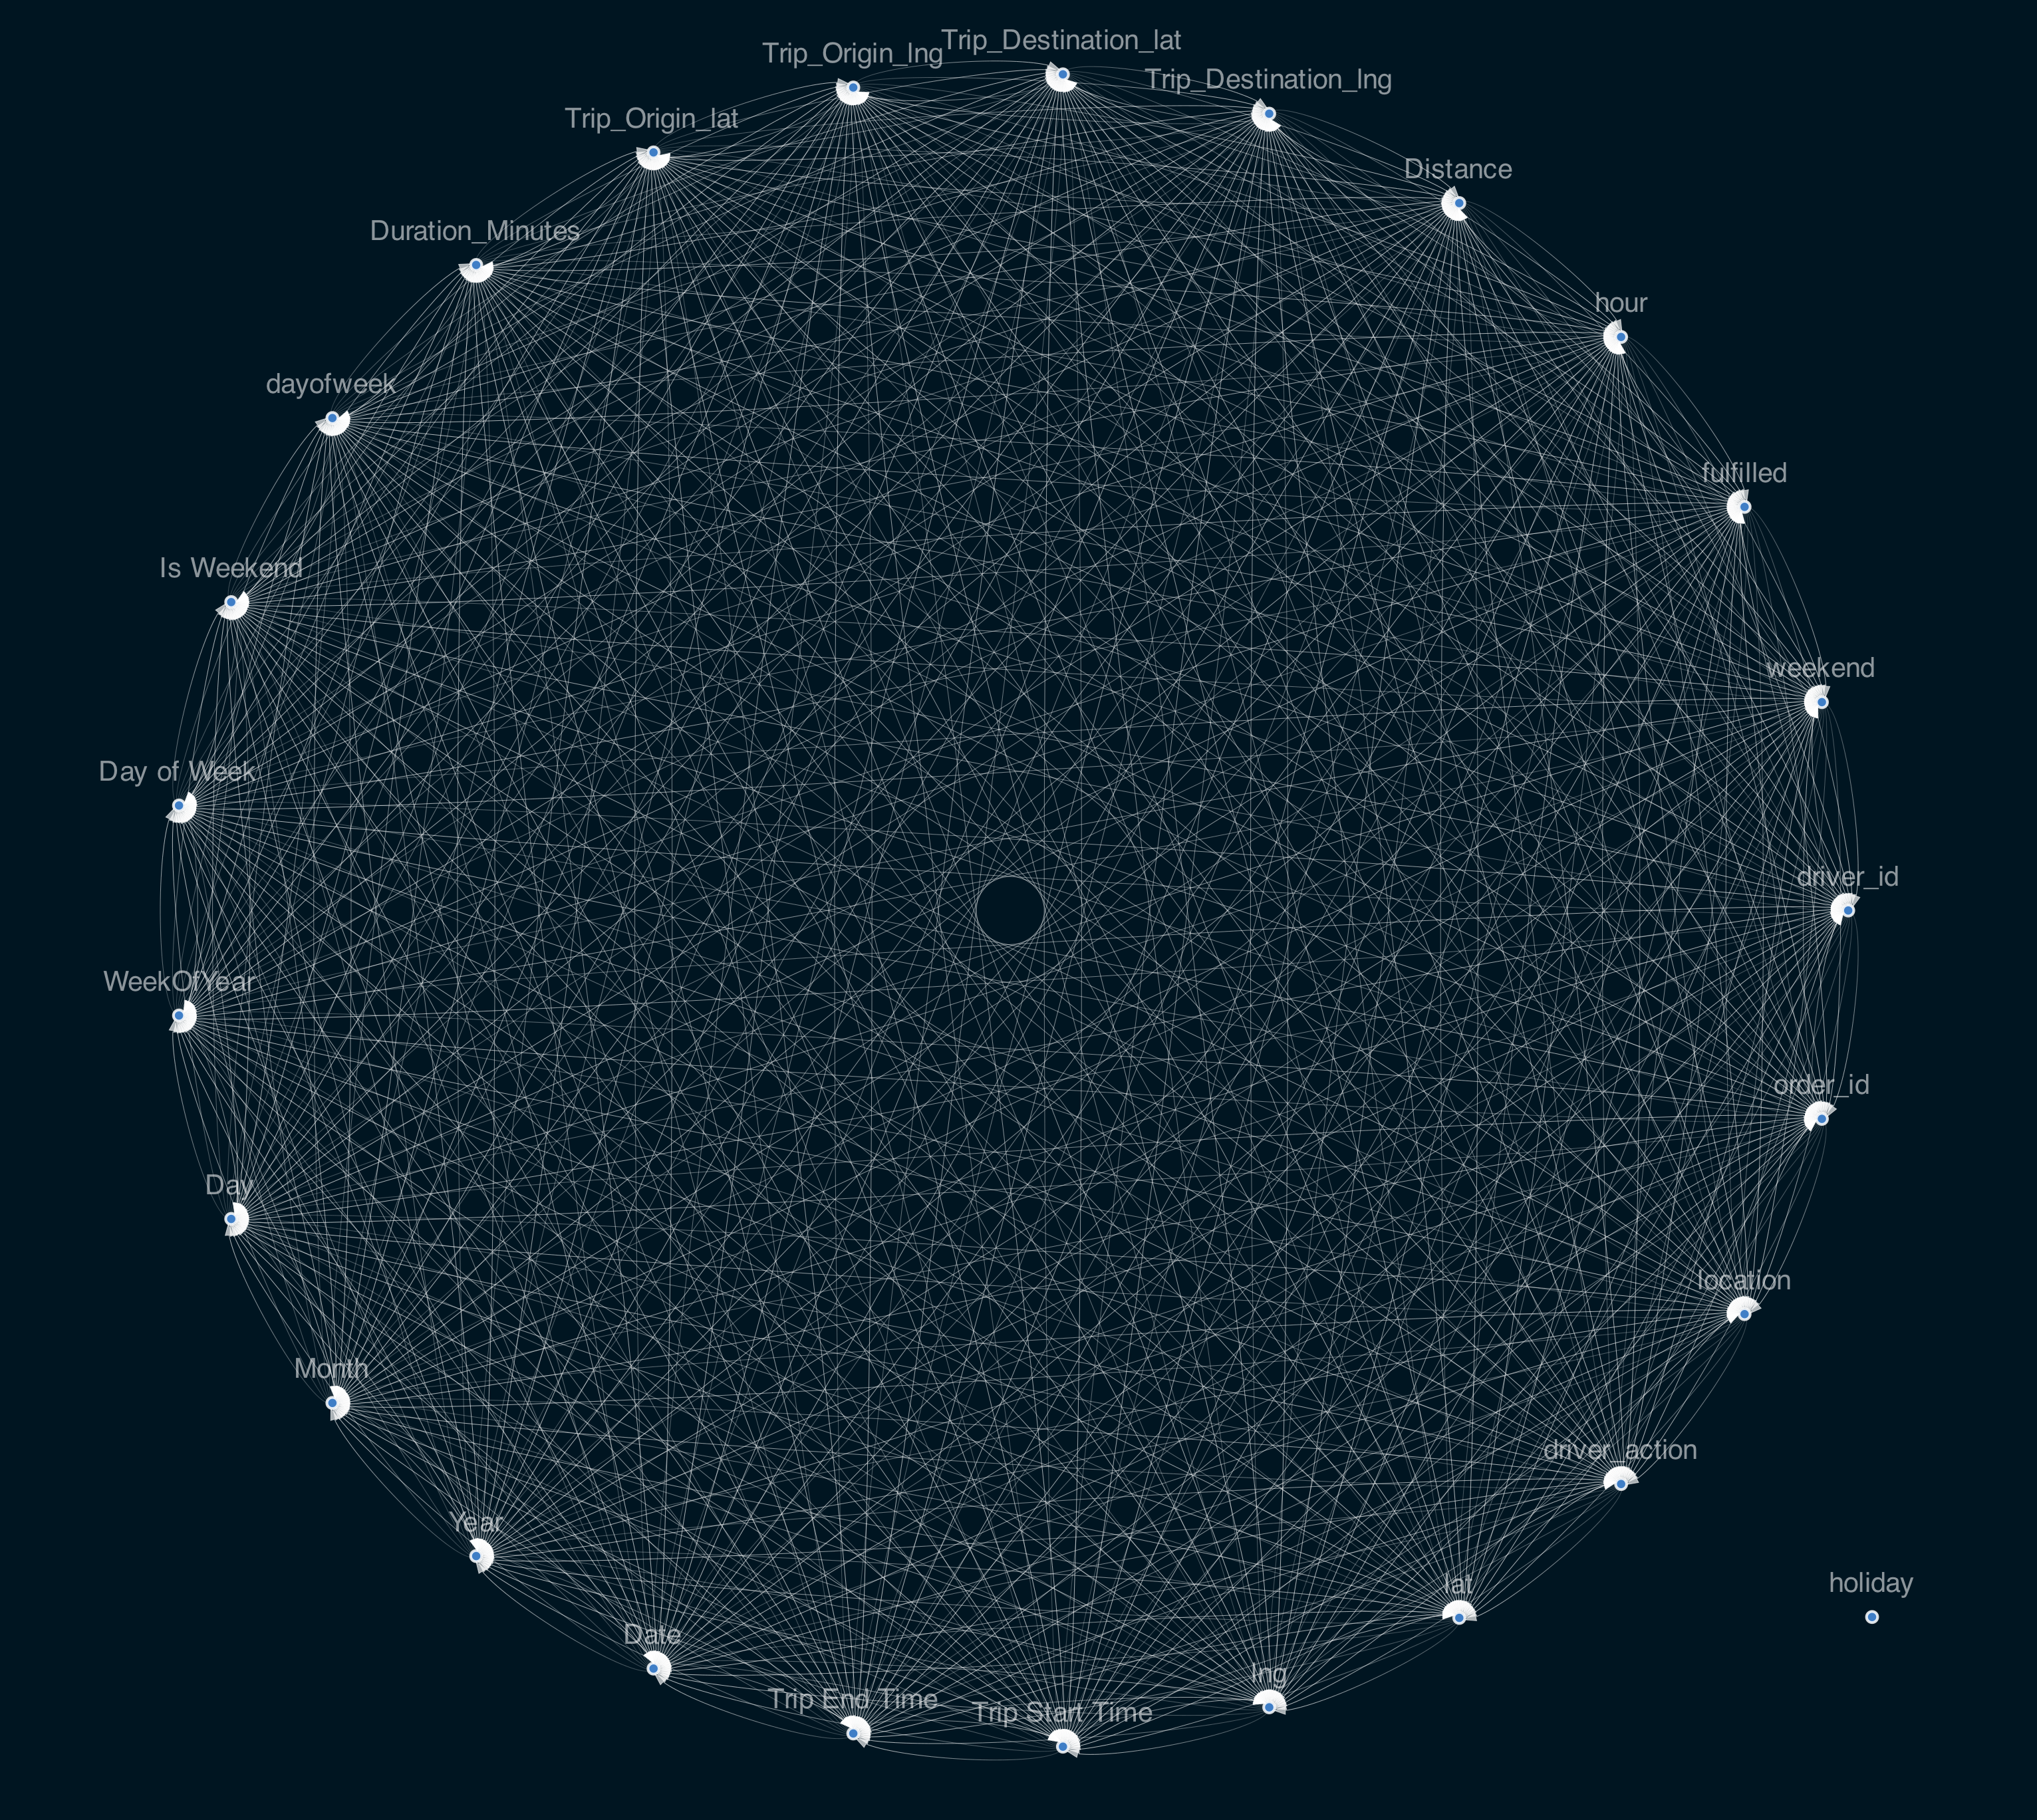

In [22]:

viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
filename = "./structure_model.png"
viz.draw(filename)
Image(viz.draw(
    format="png", prog="circo"  # `circo` produces a circular layout
),width=500)

In [56]:
sm_enh = from_pandas(sample_df, tabu_edges=[("Distance","location")],
tabu_parent_nodes=["driver_action"],tabu_child_nodes=["Date","hour"], w_threshold=0.7)


In [57]:
sm_enh.edges

OutEdgeView([('Trip Start Time', 'order_id'), ('Trip Start Time', 'driver_id'), ('Trip Start Time', 'Year'), ('Trip End Time', 'order_id'), ('Trip End Time', 'driver_id'), ('Trip End Time', 'Year'), ('Date', 'order_id'), ('Date', 'driver_id'), ('Date', 'Year'), ('Year', 'order_id'), ('Year', 'driver_id'), ('WeekOfYear', 'order_id'), ('Duration_Minutes', 'order_id'), ('Duration_Minutes', 'driver_id'), ('hour', 'order_id'), ('location', 'order_id')])

In [37]:
# sample_df1=sample_df.copy()
# sample_df1.columns

In [31]:
# sample_df1.drop(columns=["Day of Week","lat","lng"],inplace=True)

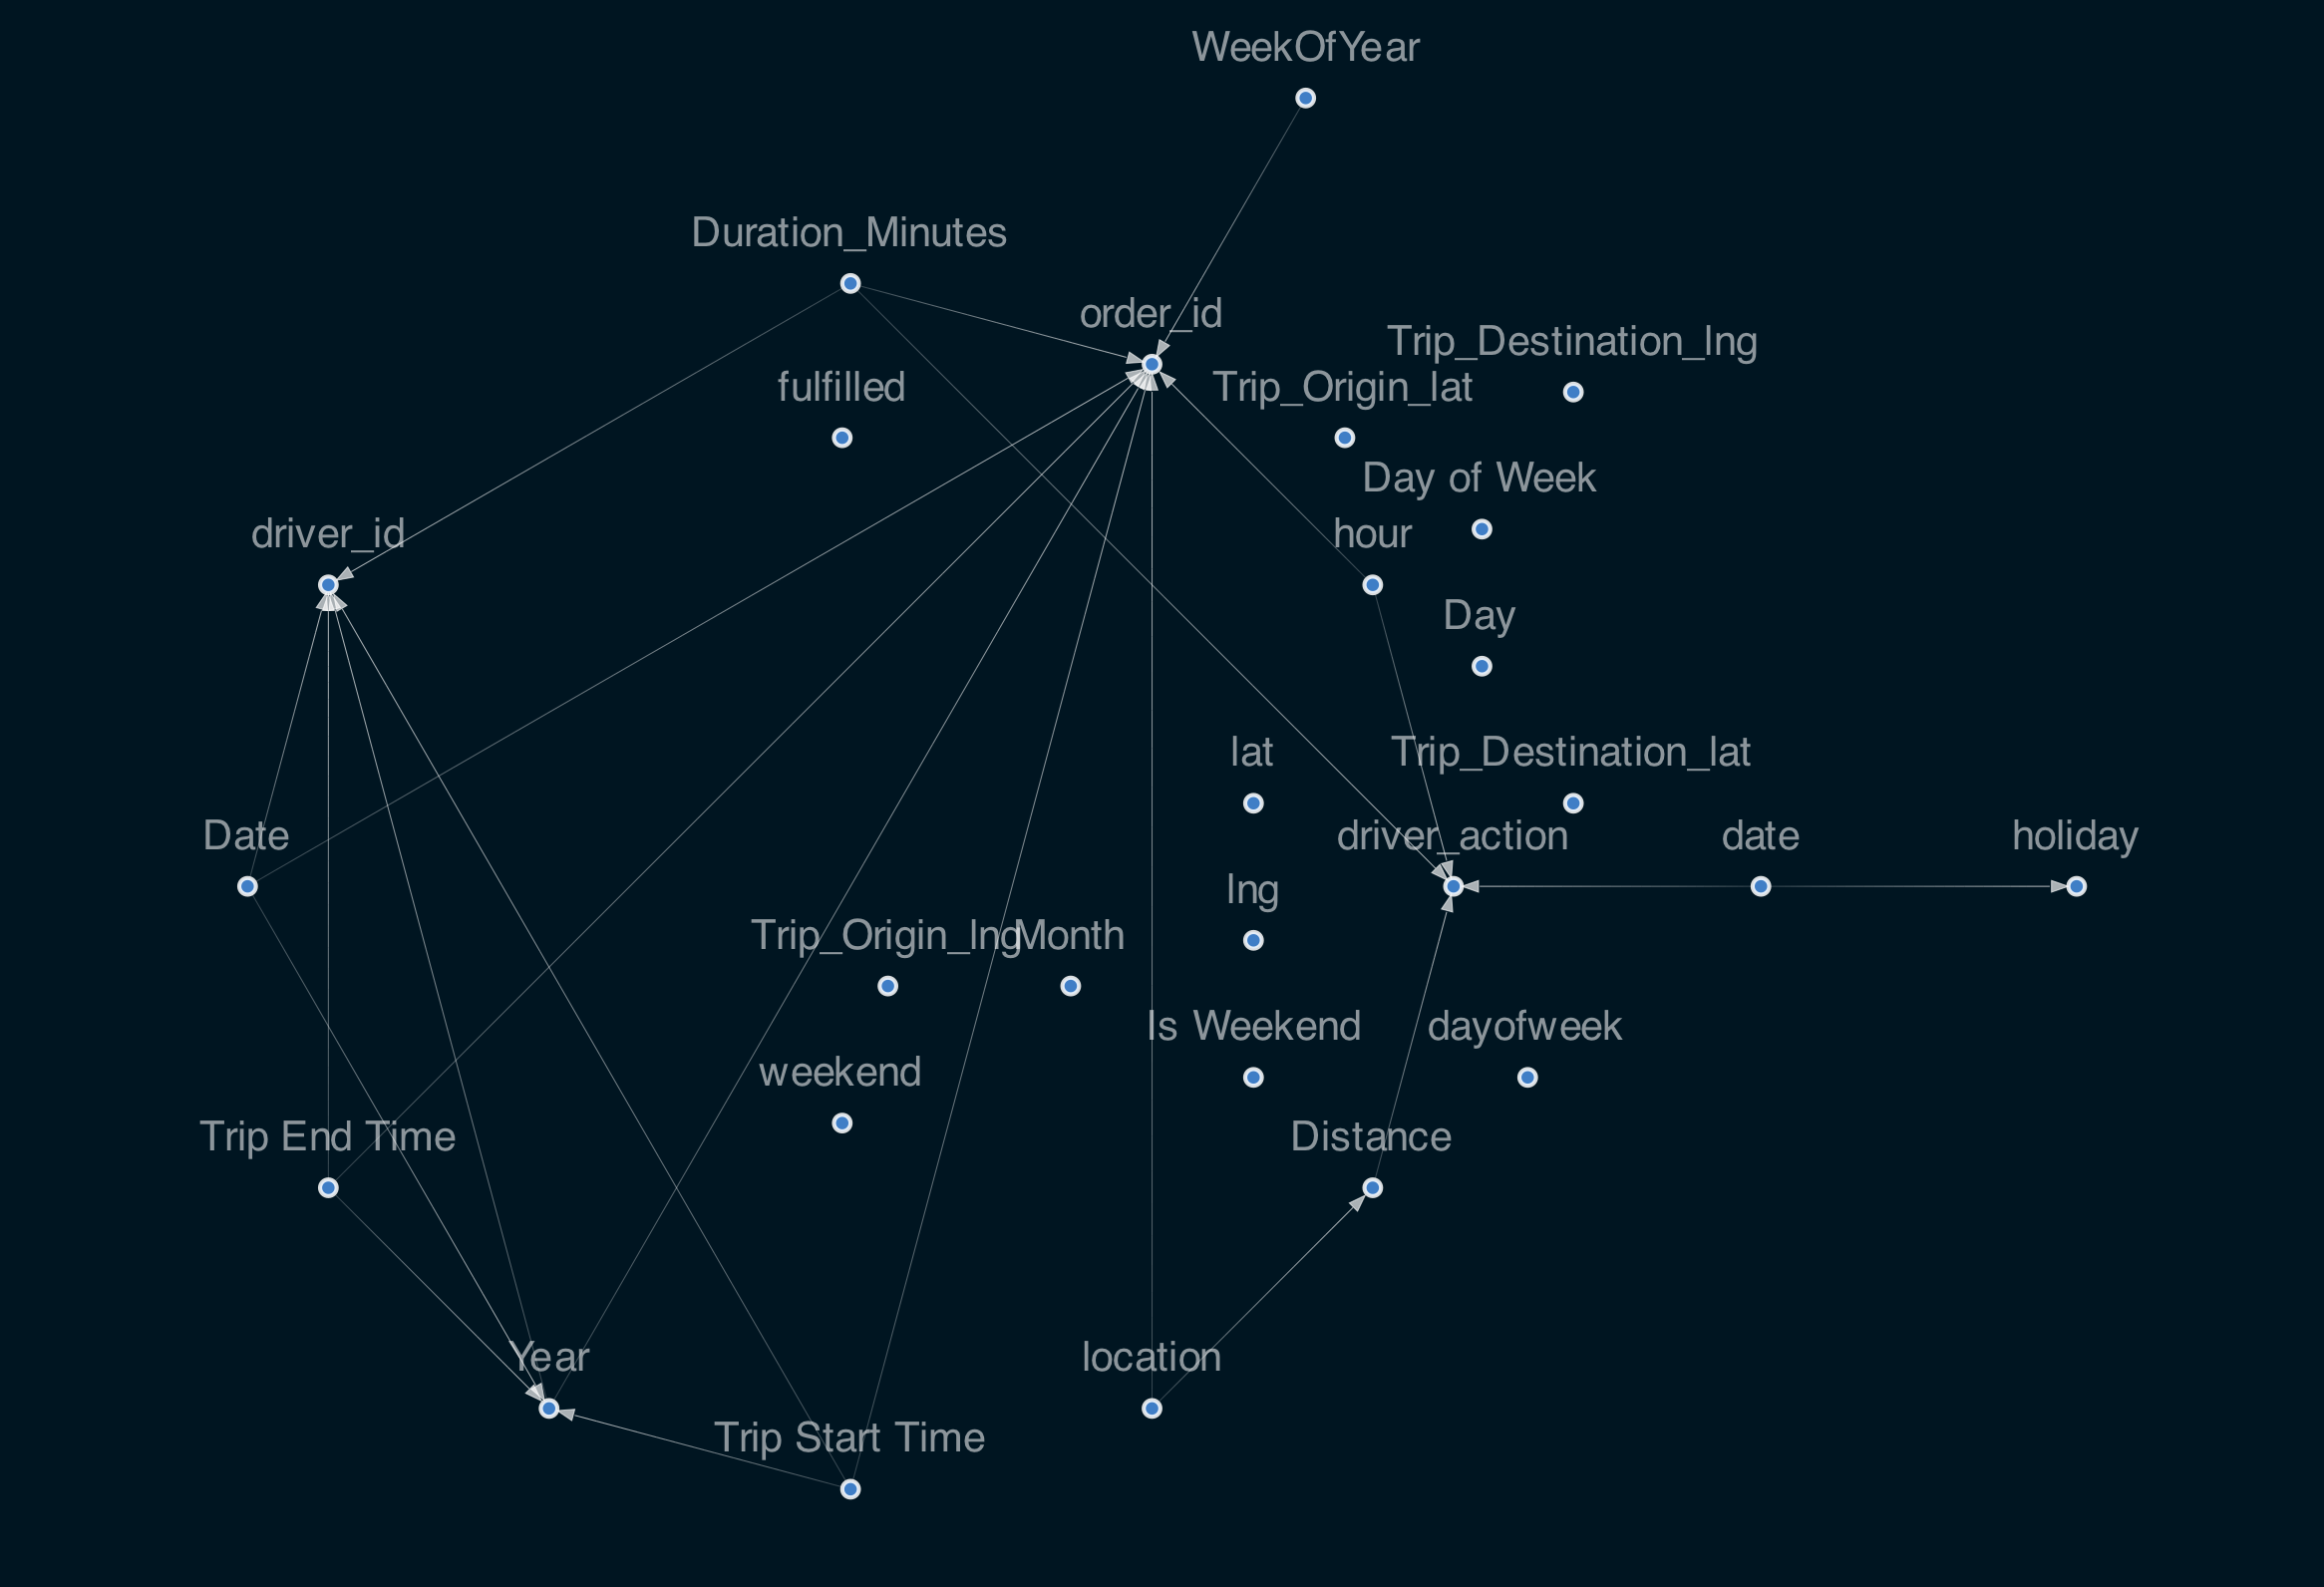

In [30]:
viz = plot_structure(
    sm_enh,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
    prog='fdp'
)
Image(viz.draw(
    format="png", prog="circo"  # `circo` produces a circular layout
),width=800)


`drop some unnessessary columns for the structure`

In [ ]:
sm_enh.remove_edge("Distance", "driver_action")
sm_enh.remove_edge("date", "driver_action")
sm_enh.remove_edge("date", "holiday")
sm_enh.remove_edge("hour", "driver_action")
sm_enh.remove_edge("location", "Distance")
sm_enh.remove_edge("Duration_Minutes", "driver_action")
sm_enh.remove_edge("Distance", "driver_action")
sm_enh.remove_edge("Distance","fulfilled")


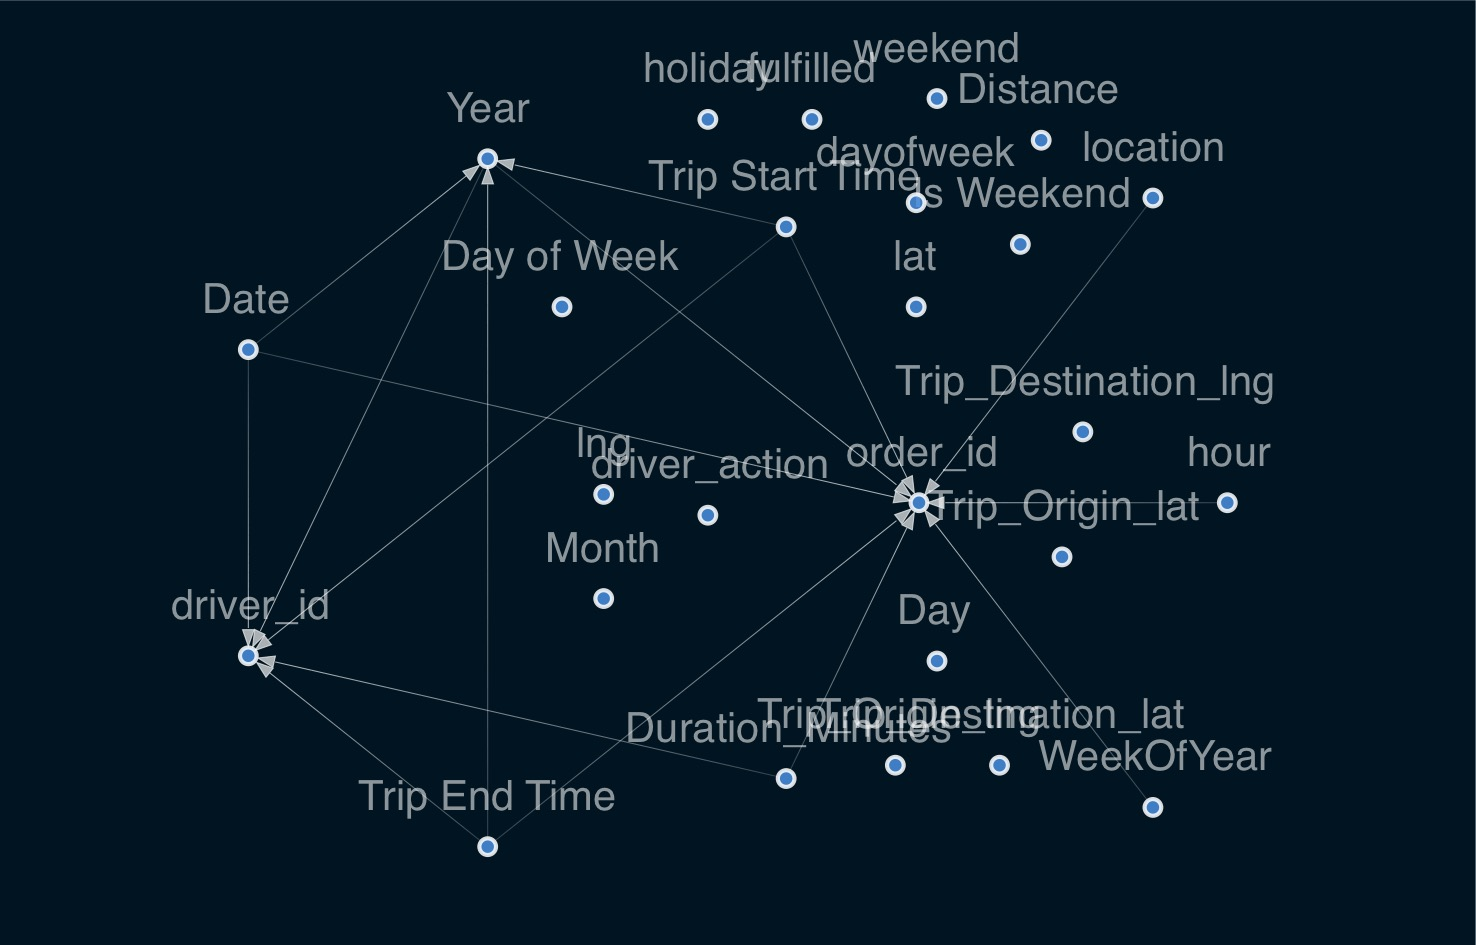

In [60]:
viz = plot_structure(
    sm_enh,
    graph_attributes={"scale": "0.5"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
    prog='fdp'
)
Image(viz.draw(
    format="jpg", prog="circo"  # `circo` produces a circular layout
),width=1000)

In [44]:
sample_df.columns


Index(['order_id', 'driver_id', 'driver_action', 'lat', 'lng',
       'Trip Start Time', 'Trip End Time', 'Date', 'Year', 'Month', 'Day',
       'WeekOfYear', 'Day of Week', 'Is Weekend', 'dayofweek',
       'Duration_Minutes', 'Trip_Origin_lat', 'Trip_Origin_lng',
       'Trip_Destination_lat', 'Trip_Destination_lng', 'Distance', 'hour',
       'fulfilled', 'holiday', 'weekend', 'location'],
      dtype='object')

In [61]:
cleaned_driver_loc=sample_df[["Trip_Destination_lat","Trip_Destination_lng"]]
cleaned_request_loc=sample_df[["Trip_Origin_lat","Trip_Origin_lng"]]

In [62]:
from sklearn.cluster import KMeans

kmeans = KMeans(
    init="random",
    n_clusters=50,
    n_init=10,
    max_iter=300,
    random_state=42
)
# do clustering
kmeans.fit(cleaned_request_loc)
# save results
cleaned_request_labels = kmeans.labels_

# do clustering
kmeans.fit(cleaned_driver_loc)
# save results
cleaned_driver_labels = kmeans.labels_

`Get largest subgraph`


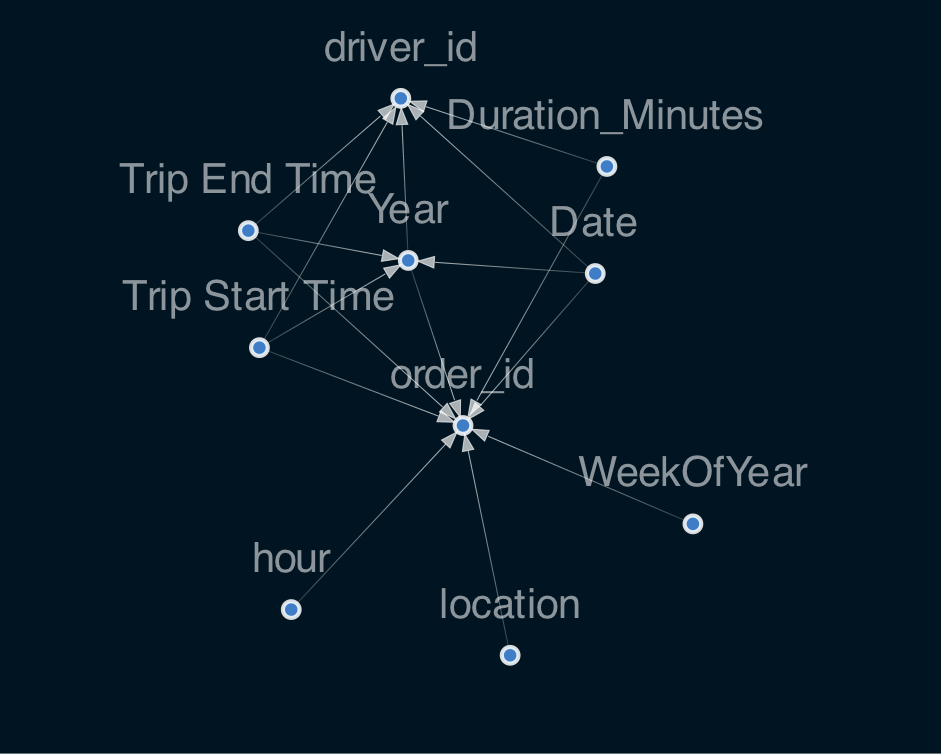

In [68]:
sm_enhanced = sm_enh.get_largest_subgraph()
viz = plot_structure(
    sm_enhanced,
    graph_attributes={"scale": "0.7","fontsize":"small"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK,
)
Image(viz.draw(format='png'),width=1000)

In [7]:
# bn = BayesianNetwork(sm_enhanced)

In [77]:
from causalnex.discretiser import Discretiser

discretised_data = sample_df.copy()

discretised_data["duration_min"] = Discretiser(method="fixed",
                          numeric_split_points=[10]).transform(discretised_data["Duration_Minutes"].values)
discretised_data["distance_diff"] = Discretiser(method="fixed",
                          numeric_split_points=[5]).transform(discretised_data["Distance"].values)
discretised_data["month"] = Discretiser(method="fixed",
                          numeric_split_points=[4,8]).transform(discretised_data["Month"].values)
discretised_data["day"] = Discretiser(method="fixed",
                          numeric_split_points=[10,20]).transform(discretised_data["Day"].values)
discretised_data["minute"] = Discretiser(method="fixed",
                          numeric_split_points=[30]).transform(discretised_data["Duration_Minutes"].values)
discretised_data["hour"] = Discretiser(method="fixed",
                          numeric_split_points=[8,16]).transform(discretised_data["hour"].values)

In [13]:
train, test = train_test_split(sample_df, train_size=0.9, test_size=0.1, random_state=7)

In [86]:
print(f"The ground truth is '{discretised_data.loc[18, 'fulfilled']}'")

The ground truth is 'yes'


`Machiene learning Model`

train, test = train_test_split(discretised_data, train_size=0.9, test_size=0.1, random_state=7)

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
X = sample_df.drop(columns=['fulfilled'], axis=1)
y = sample_df['fulfilled']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123)
pipeline = Pipeline(steps=[
    ('regressor', RandomForestRegressor(n_estimators=12, random_state=42))
])
model = pipeline.fit(X_train, y_train)

In [19]:
val_accuracy = model.score(X_test, y_test)
val_accuracy#output 1.0

1.0

We can see that the validation accuracy is 1.0 which means that the model is overfitting.